In [2]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from IPython.display import display
# plt.style.use(["science","no-latex", "/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle"])
plt.style.use([ "/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle"])
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

In [42]:
from importlib import reload
import DataReader
reload(DataReader)
from DataReader import WaveDumpReader,Workflow_WaveformRec,SubtractBaseline, WaveformRec
from copy import copy

dir_path = {"w/ source(ch0)":"/afs/ihep.ac.cn/users/l/luoxj/Data_PMT_test_dEdxExp/Add_Source_Am241_triggerCh0_2/wave0.dat",
            "w/ source(ch1)":"/afs/ihep.ac.cn/users/l/luoxj/Data_PMT_test_dEdxExp/Add_Source_Am241_triggerCh0_2/wave1.dat",
            "w/ source(ch2)":"/afs/ihep.ac.cn/users/l/luoxj/Data_PMT_test_dEdxExp/Add_Source_Am241_triggerCh0_2/wave2.dat",
            }
dir_df_data = {}
for key,path in dir_path.items():
    df_data = WaveDumpReader(path,nEvts=-1)
    df_data = df_data[1000:].reset_index()
    SubtractBaseline(df_data)
    dir_df_data[key] = df_data
    display(df_data)
    # df_data_signal = Workflow_WaveformRec(df_data,plot_check=False, threshold_times_std=5,)
    # del df_data
    # dir_df_data[key] = copy(df_data_signal)

waveform_series = None

for key,df_data in dir_df_data.items():
    if waveform_series is None:
        waveform_series = df_data["waveform_sub_base"]
    else:
        waveform_series += df_data["waveform_sub_base"]
display(waveform_series)

,index,boardID,filePath,channel,pattern,eventCounter,triggerTimeTag,triggerTime,waveform,waveform_sub_base
0,1000,31,2082024,0,262144,2092,3363077023,2.690462e+07,"[609, 610, 610, 609, 609, 608, 608, 608, 608, ...","[-0.049999999999954525, -1.0499999999999545, -..."
1,1001,31,2084106,0,0,2093,3363113819,2.690491e+07,"[609, 609, 609, 609, 608, 609, 610, 609, 608, ...","[-0.12999999999999545, -0.12999999999999545, -..."
2,1002,31,2086188,0,65536,2094,3363390535,2.690712e+07,"[608, 609, 608, 608, 609, 610, 609, 609, 609, ...","[0.8099999999999454, -0.19000000000005457, 0.8..."
3,1003,31,2088270,0,131072,2095,3364229995,2.691384e+07,"[609, 609, 609, 608, 609, 610, 609, 608, 609, ...","[-0.11000000000001364, -0.11000000000001364, -..."
4,1004,31,2090352,0,65536,2096,3366085129,2.692868e+07,"[608, 609, 609, 609, 610, 609, 609, 608, 609, ...","[0.9400000000000546, -0.05999999999994543, -0...."
...,...,...,...,...,...,...,...,...,...,...
20793,21793,31,45373050,0,393216,22885,41428689599,3.314295e+08,"[608, 609, 609, 609, 609, 609, 608, 609, 608, ...","[0.9700000000000273, -0.029999999999972715, -0..."
20794,21794,31,45375132,0,65536,22886,41431567955,3.314525e+08,"[609, 610, 609, 609, 609, 610, 609, 609, 609, ...","[0.03999999999996362, -0.9600000000000364, 0.0..."
20795,21795,31,45377214,0,65536,22887,41441721203,3.315338e+08,"[610, 609, 609, 609, 609, 608, 609, 609, 609, ...","[-1.1200000000000045, -0.12000000000000455, -0..."
20796,21796,31,45379296,0,327680,22888,41441964463,3.315357e+08,"[609, 608, 608, 608, 609, 609, 609, 609, 610, ...","[-0.0, 1.0, 1.0, 1.0, -0.0, -0.0, -0.0, -0.0, ..."


,index,boardID,filePath,channel,pattern,eventCounter,triggerTimeTag,triggerTime,waveform,waveform_sub_base
0,1000,31,2082024,1,262144,2092,3363077023,2.690462e+07,"[603, 602, 602, 602, 602, 602, 601, 602, 601, ...","[-1.0499999999999545, -0.049999999999954525, -..."
1,1001,31,2084106,1,0,2093,3363113819,2.690491e+07,"[602, 602, 602, 602, 602, 602, 602, 603, 602, ...","[-0.05999999999994543, -0.05999999999994543, -..."
2,1002,31,2086188,1,65536,2094,3363390535,2.690712e+07,"[602, 602, 602, 601, 602, 601, 602, 602, 602, ...","[-0.08000000000004093, -0.08000000000004093, -..."
3,1003,31,2088270,1,131072,2095,3364229995,2.691384e+07,"[601, 602, 602, 602, 602, 602, 601, 602, 601, ...","[0.8899999999999864, -0.11000000000001364, -0...."
4,1004,31,2090352,1,65536,2096,3366085129,2.692868e+07,"[602, 602, 602, 601, 602, 602, 602, 602, 602, ...","[-0.16999999999995907, -0.16999999999995907, -..."
...,...,...,...,...,...,...,...,...,...,...
20793,21793,31,45373050,1,393216,22885,41428689599,3.314295e+08,"[601, 602, 601, 602, 602, 602, 603, 601, 602, ...","[0.9099999999999682, -0.09000000000003183, 0.9..."
20794,21794,31,45375132,1,65536,22886,41431567955,3.314525e+08,"[602, 602, 601, 602, 602, 602, 601, 601, 602, ...","[-0.08000000000004093, -0.08000000000004093, 0..."
20795,21795,31,45377214,1,65536,22887,41441721203,3.315338e+08,"[602, 602, 602, 602, 602, 602, 602, 601, 601, ...","[-0.08000000000004093, -0.08000000000004093, -..."
20796,21796,31,45379296,1,327680,22888,41441964463,3.315357e+08,"[602, 603, 601, 602, 602, 602, 602, 602, 602, ...","[0.08000000000004093, -0.9199999999999591, 1.0..."


,index,boardID,filePath,channel,pattern,eventCounter,triggerTimeTag,triggerTime,waveform,waveform_sub_base
0,1000,31,2082024,2,262144,2092,3363077023,2.690462e+07,"[600, 602, 601, 603, 601, 601, 601, 602, 600, ...","[1.2100000000000364, -0.7899999999999636, 0.21..."
1,1001,31,2084106,2,0,2093,3363113819,2.690491e+07,"[600, 602, 601, 603, 601, 602, 600, 602, 601, ...","[1.169999999999959, -0.8300000000000409, 0.169..."
2,1002,31,2086188,2,65536,2094,3363390535,2.690712e+07,"[601, 601, 601, 600, 601, 600, 601, 600, 601, ...","[-0.01999999999998181, -0.01999999999998181, -..."
3,1003,31,2088270,2,131072,2095,3364229995,2.691384e+07,"[600, 601, 601, 601, 602, 601, 601, 601, 601, ...","[1.1399999999999864, 0.13999999999998636, 0.13..."
4,1004,31,2090352,2,65536,2096,3366085129,2.692868e+07,"[602, 600, 601, 600, 602, 601, 601, 600, 601, ...","[-0.9500000000000455, 1.0499999999999545, 0.04..."
...,...,...,...,...,...,...,...,...,...,...
20793,21793,31,45373050,2,393216,22885,41428689599,3.314295e+08,"[601, 602, 601, 601, 601, 601, 601, 602, 600, ...","[0.22000000000002728, -0.7799999999999727, 0.2..."
20794,21794,31,45375132,2,65536,22886,41431567955,3.314525e+08,"[601, 601, 601, 600, 601, 601, 601, 601, 601, ...","[0.01999999999998181, 0.01999999999998181, 0.0..."
20795,21795,31,45377214,2,65536,22887,41441721203,3.315338e+08,"[602, 601, 601, 601, 602, 601, 601, 600, 601, ...","[-1.0299999999999727, -0.029999999999972715, -..."
20796,21796,31,45379296,2,327680,22888,41441964463,3.315357e+08,"[601, 601, 601, 601, 602, 601, 601, 601, 602, ...","[0.15999999999996817, 0.15999999999996817, 0.1..."


0        [0.11000000000012733, -1.8899999999998727, -0....
1        [0.9800000000000182, -1.0199999999999818, -0.0...
2        [0.7099999999999227, -0.2900000000000773, 0.70...
3        [1.919999999999959, -0.08000000000004093, -0.0...
4        [-0.17999999999994998, 0.82000000000005, -0.17...
                               ...                        
20793    [2.1000000000000227, -0.8999999999999773, 1.10...
20794    [-0.020000000000095497, -1.0200000000000955, 0...
20795    [-2.230000000000018, -0.2300000000000182, -0.2...
20796    [0.2400000000000091, 0.2400000000000091, 2.240...
20797    [0.16000000000008185, 0.16000000000008185, 0.1...
Name: waveform_sub_base, Length: 20798, dtype: object

In [43]:
v_Q = []
for wave in waveform_series:
    v_Q.append(WaveformRec(wave)["Q"])
v_Q = np.concatenate(v_Q)

[]

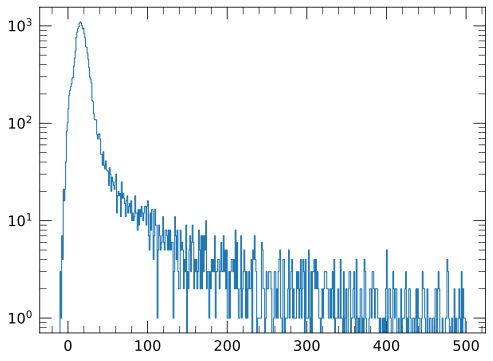

In [48]:
plt.hist(v_Q,bins=range(-10, 500,1),histtype="step")
plt.semilogy()

In [20]:
reload(DataReader)
from DataReader import  GetTQArrays
dir_TQ_diff_source = {}
for key,df_data_signal in dir_df_data.items():
    dir_TQ = GetTQArrays(df_data_signal)
    dir_TQ_diff_source[key] = dir_TQ


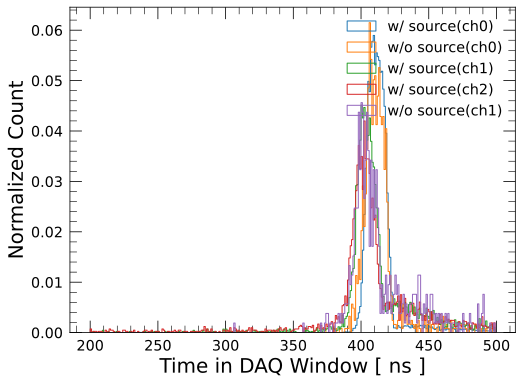

In [47]:
for key,dir_TQ in dir_TQ_diff_source.items():
    plt.hist(dir_TQ["T"], bins=range(200, 1000,2),histtype="step",density=True,
             label=key)
plt.xlabel("Time in DAQ Window [ ns ]")
plt.ylabel("Normalized Count")
plt.legend()

No handles with labels found to put in legend.


Text(0, 0.5, 'Count of Hits')

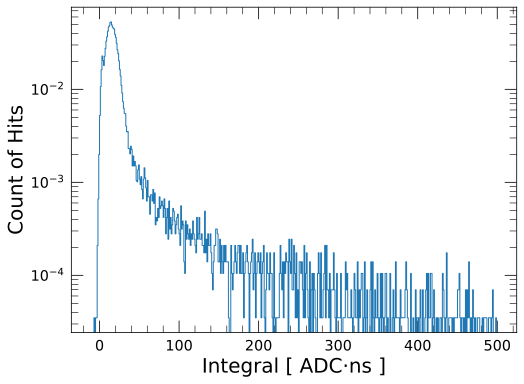

In [24]:
v_Q = []
for key,dir_TQ in dir_TQ_diff_source.items():
    if "w/o" in key:
        # plt.hist(dir_TQ["Q"][(dir_TQ["valley"]>-2)], bins=np.arange(-10,200), histtype="step",density=True,
        #      label=key)
        continue
    v_Q = np.concatenate((v_Q,dir_TQ["Q"][(dir_TQ["valley"]>-2)]))
plt.hist(v_Q, bins=np.arange(-10,500), histtype="step",density=True)
plt.semilogy()
plt.legend()
plt.xlabel("Integral [ ADC$\cdot$ns ]")
plt.ylabel("Count of Hits")